In [68]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import random
import WranglerFunctions as wf

from datetime import datetime
from datetime import timedelta

# Finacial Datasets: BCOMIN Index

BCOMIN Index : Bloomberg Industrial Metals Subindex.

"This index is composed of futures contracts on aluminum, copper, nickel and zinc. It reflects the return of underlying commodity futures price movements only. It is quoted in USD."

Source : https://www.bloomberg.com/quote/BCOMIN:IND

Steps according to the CRISP-DM process:

### 1) Business understanding: 
#### What does the business need?
Insight into the factors that drive the earnings of the companies in the FTSE 350 Metal and Mining.

### 2) Understanding the data:
#### What is the data?

  - PX_OPEN: Daily opening price
  - PX_HIGH: Daily high 
  - PX_LOW:  Daily low 
  - PX_LAST: Daily closing price
  
  MORE TO DO

### 3) Data Preparation

In [4]:
raw_data = pd.read_csv('BCOMIN.csv', index_col=False)
raw_data

,Unnamed: 0,BCOMIN Index,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,#NAME?,#NAME?,#NAME?,#NAME?
1,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
2,#NAME?,81.31,81.31,81.307,81.3074
3,04/01/2000,80.36,80.65,79.94,80.1822
4,05/01/2000,80.18,80.86,79.46,80.7709
...,...,...,...,...,...
5544,25/01/2022,179.4457,180.8969,178.2188,180.5218
5545,26/01/2022,180.8248,183.0417,180.6327,182.4112
5546,27/01/2022,180.3818,182.4448,179.5786,181.029
5547,28/01/2022,181.613,181.8342,178.7289,178.913


In [104]:
clean_data = raw_data.drop(labels=0)

# Dates should be used to index the dataset
clean_data.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
#clean_data.set_index('Dates', inplace=True)

#clean_data = clean_data.drop(labels='Dates')
clean_data.rename(columns={'BCOMIN Index' : 'PX_OPEN', 
                           'Unnamed: 2': 'PX_HIGH', 
                           'Unnamed: 3':'PX_LOW', 
                           'Unnamed: 4' :'PX_LAST'}, inplace=True)
clean_data = clean_data.iloc[2: , :] #Remove first 2 error lines
clean_data.reset_index(drop=True, inplace=True)
for i in range(len(clean_data)):
    clean_data["Dates"][i] = datetime.strptime(clean_data["Dates"][i], "%d/%m/%Y") #Puts dates into TimeStamp format
BCOMIN_dataset = clean_data
BCOMIN_dataset

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
0,2000-01-04 00:00:00,80.36,80.65,79.94,80.1822
1,2000-01-05 00:00:00,80.18,80.86,79.46,80.7709
2,2000-01-06 00:00:00,80.2,80.84,80.2,80.6783
3,2000-01-07 00:00:00,80.68,81.18,80.42,80.7415
4,2000-01-10 00:00:00,80.41,80.75,79.77,80.0735
...,...,...,...,...,...
5541,2022-01-25 00:00:00,179.4457,180.8969,178.2188,180.5218
5542,2022-01-26 00:00:00,180.8248,183.0417,180.6327,182.4112
5543,2022-01-27 00:00:00,180.3818,182.4448,179.5786,181.029
5544,2022-01-28 00:00:00,181.613,181.8342,178.7289,178.913


In [105]:
fig = go.Figure(data=go.Ohlc(x=BCOMIN_dataset['Dates'],
                    open=BCOMIN_dataset['PX_OPEN'],
                    high=BCOMIN_dataset['PX_HIGH'],
                    low=BCOMIN_dataset['PX_LOW'],
                    close=BCOMIN_dataset['PX_LAST']))
fig.show()

In [106]:
companies_financial_dataset = pd.read_csv('../Financial_dataset/F3METL_Comp.csv', index_col = False)
companies_financial_dataset = wf.F3Metl_Comp_Wrangler(companies_financial_dataset)
company_names = set(companies_financial_dataset.columns.get_level_values(0).tolist())

def getEBITDAUnique(df, companyName): #Stolen from DataExploration
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique




0    2010-06-30
1    2010-12-31
2    2011-06-30
3    2012-01-02
4    2012-07-02
5    2012-12-31
6    2013-07-01
7    2013-12-31
8    2014-06-30
9    2014-12-31
10   2015-06-30
11   2015-12-31
12   2016-06-30
13   2017-01-02
14   2017-06-30
15   2018-01-01
16   2018-07-02
17   2018-12-31
18   2019-07-01
19   2019-12-31
20   2020-06-30
21   2020-12-31
22   2021-06-30
Name: Dates, dtype: datetime64[ns]
EVR LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.342258 |
| BCOMIN PX_LAST | 0.342258 |         1        |


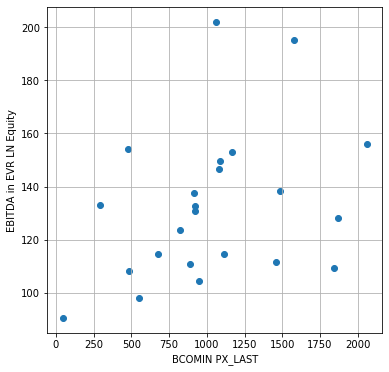


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
BHP LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.673378 |
| BCOMIN PX_LAST | 0.673378 |

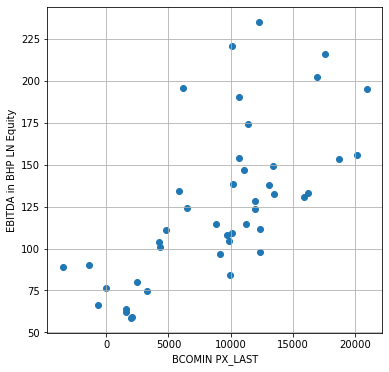


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-12-31
16   2008-06-30
17   2008-12-31
18   2009-06-30
19   2009-12-31
20   2010-06-30
21   2010-12-31
22   2011-06-30
23   2012-01-02
24   2012-07-02
25   2012-12-31
26   2013-07-01
27   2014-06-30
28   2014-12-31
29   2015-06-30
30   2015-12-31
31   2016-06-30
32   2017-01-02
33   2017-06-30
34   2018-01-01
35   2018-07-02
36   2018-12-31
37   2019-07-01
38   2019-12-31
39   2020-06-30
40   2020-12-31
41   2021-06-30
Name: Dates, dtype: datetime64[ns]
RIO LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.471248 |
| BCOMIN PX_LAST | 0.471248 |         1        |


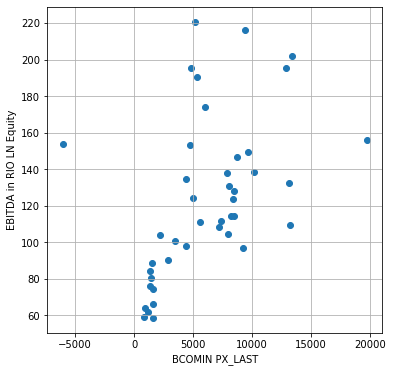


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
ANTO LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.819923 |
| BCOMIN PX_LAST | 0.819923 

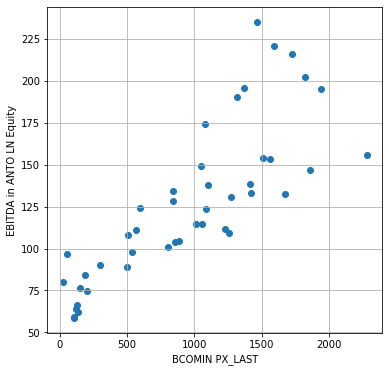


###################################################################

0    2007-07-02
1    2007-12-31
2    2008-06-30
3    2008-12-31
4    2009-06-30
5    2009-12-31
6    2010-06-30
7    2010-12-31
8    2011-06-30
9    2012-01-02
10   2012-07-02
11   2012-12-31
12   2013-07-01
13   2014-06-30
14   2014-12-31
15   2015-06-30
16   2015-12-31
17   2016-06-30
18   2017-01-02
19   2017-06-30
20   2018-01-01
21   2018-07-02
22   2018-12-31
23   2019-07-01
24   2019-12-31
25   2020-06-30
26   2020-12-31
27   2021-06-30
Name: Dates, dtype: datetime64[ns]
GLEN LN Equity

|                |    EBITDA |   BCOMIN PX_LAST |
|:---------------|----------:|-----------------:|
| EBITDA         |  1        |        -0.355397 |
| BCOMIN PX_LAST | -0.355397 |         1        |


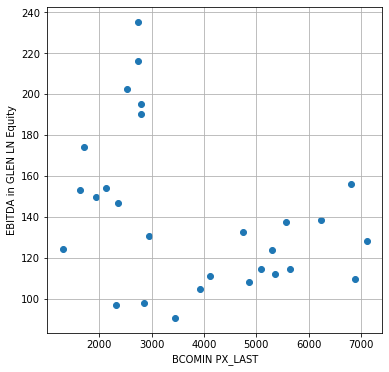


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
AAL LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.508986 |
| BCOMIN PX_LAST | 0.508986 |

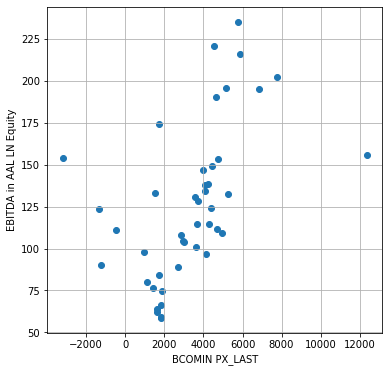


###################################################################



In [211]:
#Heavily inspired by DataExploration.ipynb
def find_closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)
    
def add_closest_to_EBITDA_date(ebitda_dataset, bcomin_dataset):
    ebitda_dataset['BCOMIN PX_LAST'] = np.nan
    for i in range(0, len(ebitda_dataset)):
        date = ebitda_dataset["Dates"][i]
        date_as_string = date.to_pydatetime()
        closest_date = find_closest_date(bcomin_dataset["Dates"], date, 0, len(bcomin_dataset))
        ebitda_dataset.loc[i, "BCOMIN PX_LAST"] =  bcomin_dataset['PX_LAST'][closest_date]
    
    ebitda_dataset['BCOMIN PX_LAST'] = ebitda_dataset['BCOMIN PX_LAST'].map(lambda x: float(x)) #Convert obj to float
    return ebitda_dataset

def scatterPlotBCOMIN_LastPXVsEBITDA(df, companyName):
    #PX_LAST as most commodity data I found contains only PX_LAST
    fig = plt.figure(figsize=(6,6))

    plt.scatter(df['EBITDA'], df['BCOMIN PX_LAST'])
    plt.xlabel('BCOMIN PX_LAST')
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()
    
for company in company_names:
    companies_ebitda = getEBITDAUnique(companies_financial_dataset,company)
    add_closest_to_EBITDA_date(companies_ebitda, BCOMIN_dataset)
    print(company + "\n")
    print(companies_ebitda.corr().to_markdown())
    scatterPlotBCOMIN_LastPXVsEBITDA(companies_ebitda, company)
    print("\n###################################################################\n")


# Specific Comodities

#### (Using PX_LAST for all comodities as the others aren't always available.)

##### CL1_COMB_Comodity     = Crude Oil
##### LMAHDS03_LME_Comdty   = Aluminium
##### LMPBDS03_LME_Comdty   = Lead
##### LMSNDS03_LME_Comdty   = Tin
##### LMCADS03_LME_Comdty   = Copper
##### LMNIDS03_LME_Comdty   = Nickel
##### LMCODY_LME_Comdty     = Cobalt  -> Only goes to 05/31/2010
##### LTBMPRIN_Index        = Lithium -> Only goes to 2009 


In [354]:
CL1_COMB_Comodity     = pd.read_csv('CL1_COMB_Comodity.csv'    , index_col=False, names=["Dates", "PX_LAST"])#Crude Oil
LMAHDS03_LME_Comdty   = pd.read_csv('LMAHDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Aluminium
LMPBDS03_LME_Comdty   = pd.read_csv('LMPBDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Lead
LMSNDS03_LME_Comdty   = pd.read_csv('LMSNDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Tin
LMCADS03_LME_Comdty   = pd.read_csv('LMCADS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Copper
LMNIDS03_LME_Comdty   = pd.read_csv('LMNIDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Nickel
LMCODY_LME_Comdty     = pd.read_csv('LMCODY_LME_Comdty.csv'    , index_col=False, names=["Dates", "PX_LAST"])#Cobalt -> Only goes to 05/31/2010
LTBMPRIN_Index        = pd.read_csv('LTBMPRIN_Index.csv'       , index_col=False, names=["Dates", "PX_LAST"])#Lithium -> Only goes to 2009 

In [347]:

def format_commodity_data_of_form_DATES_AND_PX_LAST(df):
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(df)
    try: 
        df["Dates"] = df["Dates"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
    except TypeError: 
        df["Dates"] = df["Dates"].apply(lambda x: datetime.strptime(x, "%y/%m/%d"))
    df = df.loc[::-1]
    df.reset_index(drop=True, inplace=True)
    return df

def find_closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)
    

def add_closest_to_EBITDA_date_comodity(ebitda_dataset, comodity_dataset, comodity_name):
    column_name = comodity_name + ' PX_LAST'
    ebitda_dataset[column_name] = np.nan
    i = 0
    for i in range(len(ebitda_dataset)):
        date = ebitda_dataset["Dates"][i]
        closest_date = find_closest_date(comodity_dataset["Dates"], date, 0, len(comodity_dataset["Dates"])-1)
        ebitda_dataset.loc[i, column_name] = comodity_dataset['PX_LAST'][closest_date]
    
    #ebitda_dataset['BCOMIN PX_LAST'] = ebitda_dataset['BCOMIN PX_LAST'].map(lambda x: float(x)) #Convert obj to float
    return ebitda_dataset

def scatterPlotCommodityLastPXVsEBITDA(df, companyName, comodity_name):
    #PX_LAST as most commodity data I found contains only PX_LAST
    column_name = comodity_name + ' PX_LAST'
    fig = plt.figure(figsize=(6,6))

    plt.scatter(df['EBITDA'], df[column_name])
    plt.xlabel(column_name)
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()
    
def showCorrelationAndScatter(commodity_name, commodity_index, ebitda_data, company_names):
    for company in company_names:
        print(company + "\n")
        companies_ebitda_vs_comodity = getEBITDAUnique(companies_financial_dataset, company)
        companies_ebitda_vs_comodity = add_closest_to_EBITDA_date_comodity(companies_ebitda_vs_comodity, commodity_index, comodity_name)
        print(companies_ebitda_vs_comodity.corr().to_markdown())
        scatterPlotCommodityLastPXVsEBITDA(companies_ebitda_vs_comodity, company, comodity_name)
        print("\n###################################################################\n")
        


## Crude Oil
#### CL1_COMB_Comodity

          Dates  PX_LAST
0    04/05/2022   104.33
1    03/31/2022   100.28
2    02/28/2022    95.72
3    01/31/2022    88.15
4    12/31/2021    75.21
..          ...      ...
296  08/29/1997    19.61
297  07/31/1997    20.14
298  06/30/1997    19.80
299  05/30/1997    20.88
300  04/30/1997    20.21

[301 rows x 2 columns]
EVR LN Equity

|                         |    EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|----------:|--------------------------:|
| EBITDA                  | 1         |                 0.0818143 |
| Crude Oil Index PX_LAST | 0.0818143 |                 1         |


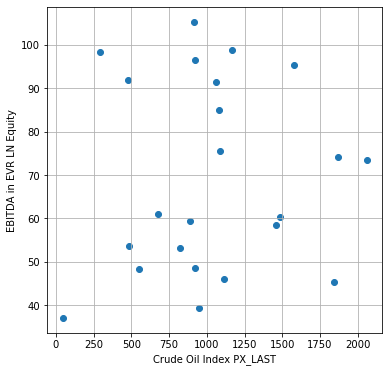


###################################################################

BHP LN Equity

|                         |   EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.757093 |
| Crude Oil Index PX_LAST | 0.757093 |                  1        |


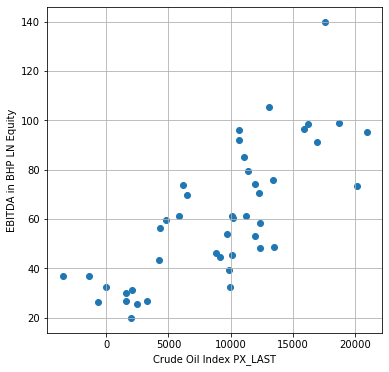


###################################################################

RIO LN Equity

|                         |   EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.395716 |
| Crude Oil Index PX_LAST | 0.395716 |                  1        |


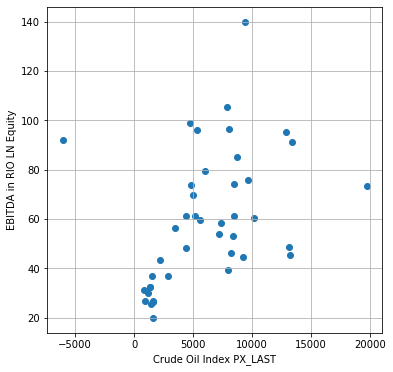


###################################################################

ANTO LN Equity

|                         |   EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.758095 |
| Crude Oil Index PX_LAST | 0.758095 |                  1        |


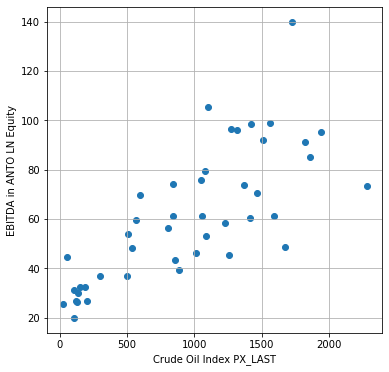


###################################################################

GLEN LN Equity

|                         |    EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|----------:|--------------------------:|
| EBITDA                  |  1        |                 -0.357379 |
| Crude Oil Index PX_LAST | -0.357379 |                  1        |


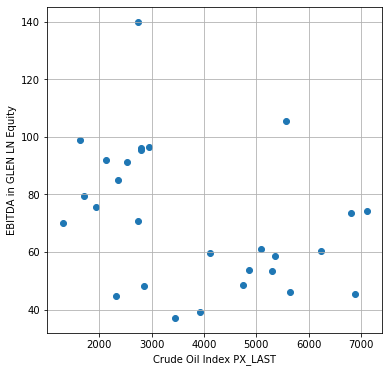


###################################################################

AAL LN Equity

|                         |   EBITDA |   Crude Oil Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.379153 |
| Crude Oil Index PX_LAST | 0.379153 |                  1        |


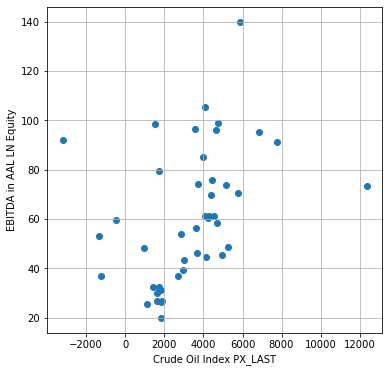


###################################################################



In [364]:
comodity_name = "Crude Oil Index"
CL1_COMB_Comodity    = CL1_COMB_Comodity = pd.read_csv('CL1_COMB_Comodity.csv'    , index_col=False, names=["Dates", "PX_LAST"])#Crude Oil
CL1_COMB_Comodity    = format_commodity_data_of_form_DATES_AND_PX_LAST(CL1_COMB_Comodity)
showCorrelationAndScatter(comodity_name, CL1_COMB_Comodity, companies_financial_dataset, company_names)

## Aluminium
#### LMAHDS03_LME_Comdty

          Dates  PX_LAST
0    04/04/2022   3447.0
1    03/31/2022   3491.0
2    02/28/2022   3368.5
3    01/31/2022   3021.0
4    12/31/2021   2807.5
..          ...      ...
296  08/29/1997   1631.5
297  07/31/1997   1700.0
298  06/30/1997   1598.0
299  05/30/1997   1619.0
300  04/30/1997   1645.0

[301 rows x 2 columns]
EVR LN Equity

|                         |   EBITDA |   Aluminium Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.634313 |
| Aluminium Index PX_LAST | 0.634313 |                  1        |


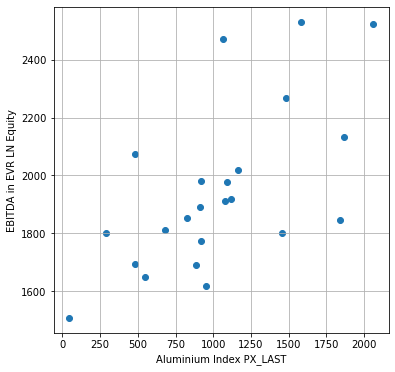


###################################################################

BHP LN Equity

|                         |   EBITDA |   Aluminium Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.596999 |
| Aluminium Index PX_LAST | 0.596999 |                  1        |


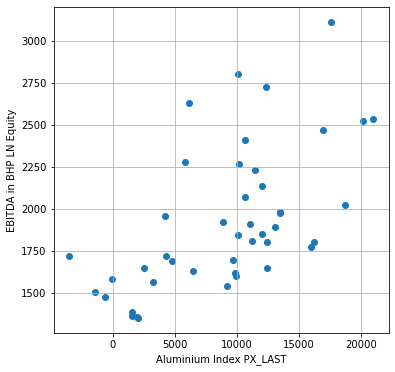


###################################################################

RIO LN Equity

|                         |   EBITDA |   Aluminium Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.467673 |
| Aluminium Index PX_LAST | 0.467673 |                  1        |


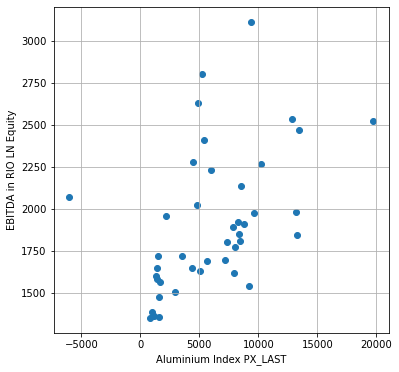


###################################################################

ANTO LN Equity

|                         |   EBITDA |   Aluminium Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.788104 |
| Aluminium Index PX_LAST | 0.788104 |                  1        |


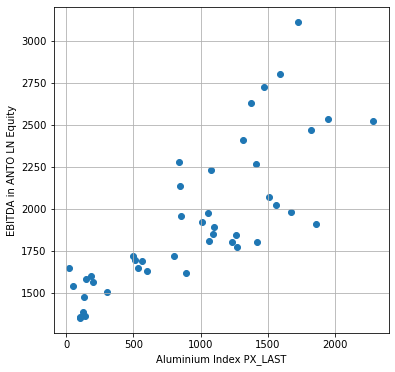


###################################################################

GLEN LN Equity

|                         |     EBITDA |   Aluminium Index PX_LAST |
|:------------------------|-----------:|--------------------------:|
| EBITDA                  |  1         |                -0.0593758 |
| Aluminium Index PX_LAST | -0.0593758 |                 1         |


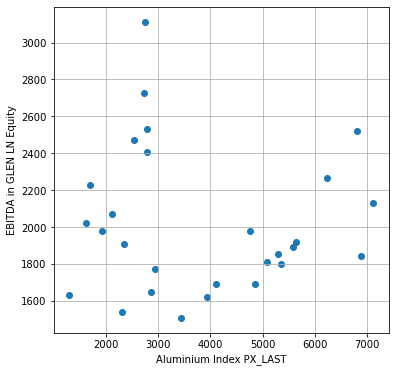


###################################################################

AAL LN Equity

|                         |   EBITDA |   Aluminium Index PX_LAST |
|:------------------------|---------:|--------------------------:|
| EBITDA                  | 1        |                  0.576282 |
| Aluminium Index PX_LAST | 0.576282 |                  1        |


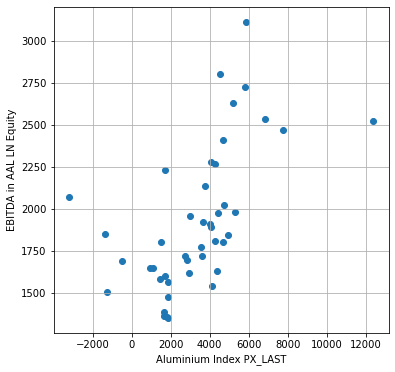


###################################################################



In [362]:
comodity_name = "Aluminium Index"
LMAHDS03_LME_Comdty = pd.read_csv('LMAHDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Aluminium
LMAHDS03_LME_Comdty = format_commodity_data_of_form_DATES_AND_PX_LAST(LMAHDS03_LME_Comdty)
showCorrelationAndScatter(comodity_name, LMAHDS03_LME_Comdty, companies_financial_dataset, company_names)

## Nickel
#### LMNIDS03 LME Comdty

          Dates      PX_LAST
0    03/30/2022  25025.10742
1    02/28/2022  18133.07422
2    01/31/2022  16616.80469
3    12/31/2021  15335.79590
4    11/30/2021  15000.75391
..          ...          ...
274  05/31/1999   2916.56250
275  04/30/1999   3439.69653
276  03/31/1999   2991.63818
277  02/26/1999   3064.59668
278  01/29/1999   2602.45654

[279 rows x 2 columns]
EVR LN Equity

|                      |   EBITDA |   Nickel Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.465997 |
| Nickel Index PX_LAST | 0.465997 |               1        |


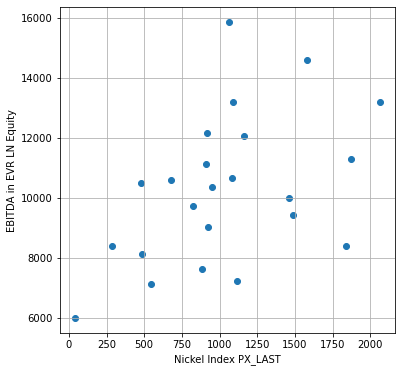


###################################################################

BHP LN Equity

|                      |   EBITDA |   Nickel Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.713252 |
| Nickel Index PX_LAST | 0.713252 |               1        |


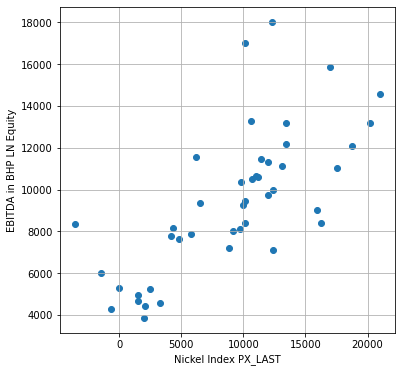


###################################################################

RIO LN Equity

|                      |   EBITDA |   Nickel Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               |  1       |                0.57527 |
| Nickel Index PX_LAST |  0.57527 |                1       |


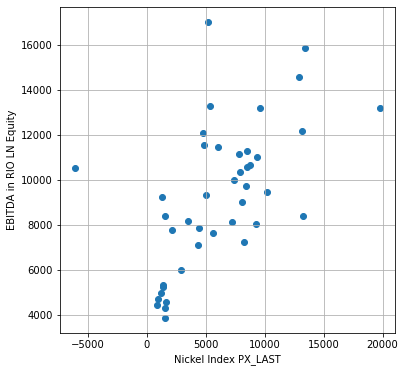


###################################################################

ANTO LN Equity

|                      |   EBITDA |   Nickel Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.801761 |
| Nickel Index PX_LAST | 0.801761 |               1        |


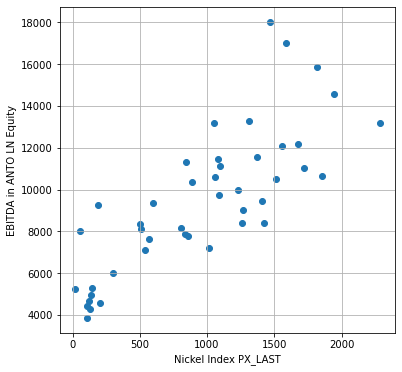


###################################################################

GLEN LN Equity

|                      |    EBITDA |   Nickel Index PX_LAST |
|:---------------------|----------:|-----------------------:|
| EBITDA               |  1        |              -0.211103 |
| Nickel Index PX_LAST | -0.211103 |               1        |


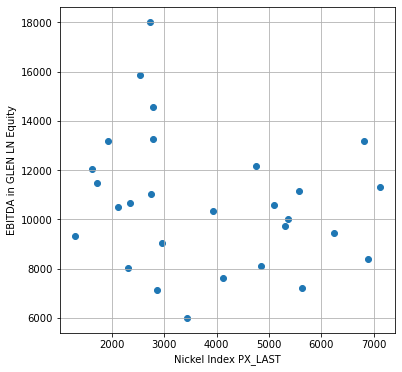


###################################################################

AAL LN Equity

|                      |   EBITDA |   Nickel Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.578275 |
| Nickel Index PX_LAST | 0.578275 |               1        |


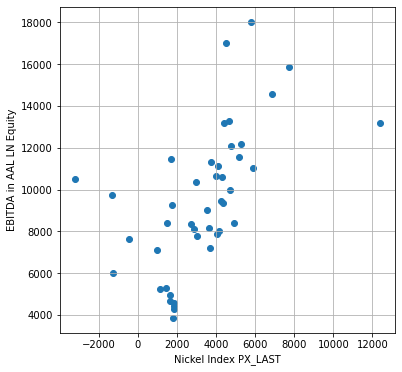


###################################################################



In [365]:
comodity_name = "Nickel Index"
LMNIDS03_LME_Comdty   = pd.read_csv('LMNIDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"]) #Nickel
LMNIDS03_LME_Comdty = format_commodity_data_of_form_DATES_AND_PX_LAST(LMNIDS03_LME_Comdty)
showCorrelationAndScatter(comodity_name, LMNIDS03_LME_Comdty, companies_financial_dataset, company_names)

## Copper
#### LMCADS03 LME Comdty

          Dates     PX_LAST
0    03/30/2022  7887.62988
1    02/28/2022  7380.70361
2    01/31/2022  7074.49561
3    12/31/2021  7181.75098
4    11/30/2021  7118.89307
..          ...         ...
275  04/30/1999   988.36847
276  03/31/1999   864.04462
277  02/26/1999   872.30328
278  01/29/1999   870.12042
279  12/31/1998   899.06598

[280 rows x 2 columns]
EVR LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               |  1       |                0.63491 |
| Copper Index PX_LAST |  0.63491 |                1       |


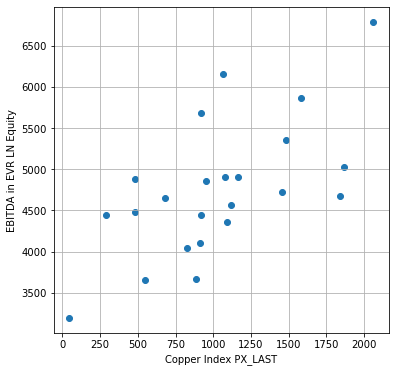


###################################################################

BHP LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.822988 |
| Copper Index PX_LAST | 0.822988 |               1        |


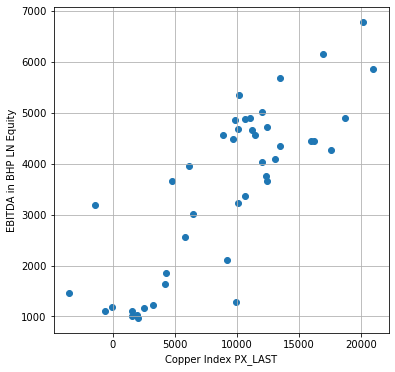


###################################################################

RIO LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.747103 |
| Copper Index PX_LAST | 0.747103 |               1        |


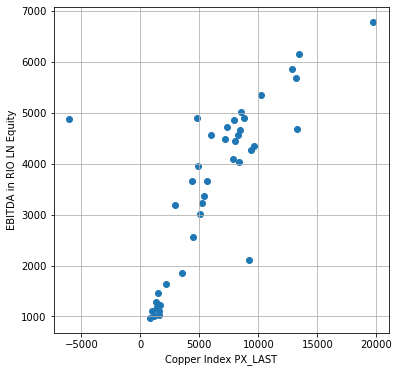


###################################################################

ANTO LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.848333 |
| Copper Index PX_LAST | 0.848333 |               1        |


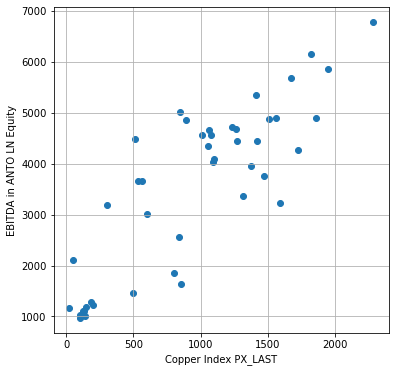


###################################################################

GLEN LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.356226 |
| Copper Index PX_LAST | 0.356226 |               1        |


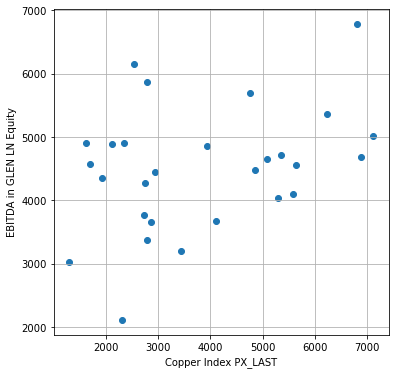


###################################################################

AAL LN Equity

|                      |   EBITDA |   Copper Index PX_LAST |
|:---------------------|---------:|-----------------------:|
| EBITDA               | 1        |               0.478818 |
| Copper Index PX_LAST | 0.478818 |               1        |


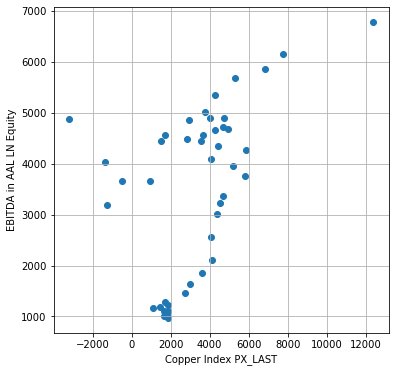


###################################################################



In [366]:
comodity_name = "Copper Index"
LMCADS03_LME_Comdty   = pd.read_csv('LMCADS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Copper
LMCADS03_LME_Comdty = format_commodity_data_of_form_DATES_AND_PX_LAST(LMCADS03_LME_Comdty)
showCorrelationAndScatter(comodity_name, LMCADS03_LME_Comdty, companies_financial_dataset, company_names)

## Tin
#### LMSNDS03 LME Comdty

          Dates  PX_LAST
0    04/04/2022  44155.0
1    03/31/2022  42910.0
2    02/28/2022  45224.0
3    01/31/2022  43023.0
4    12/31/2021  38860.0
..          ...      ...
296  08/29/1997   5435.0
297  07/31/1997   5545.0
298  06/30/1997   5570.0
299  05/30/1997   5565.0
300  04/30/1997   5700.0

[301 rows x 2 columns]
EVR LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.413063 |
| Tin Index PX_LAST | 0.413063 |            1        |


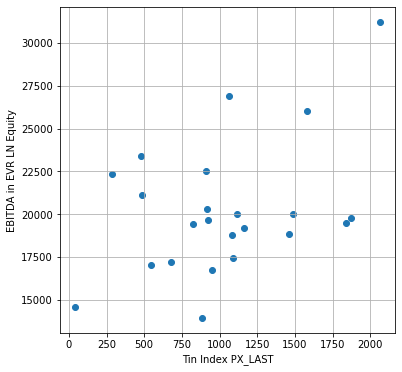


###################################################################

BHP LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.839895 |
| Tin Index PX_LAST | 0.839895 |            1        |


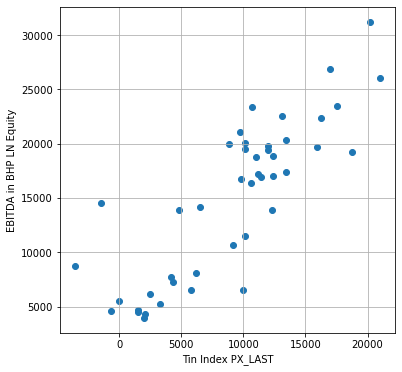


###################################################################

RIO LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.714396 |
| Tin Index PX_LAST | 0.714396 |            1        |


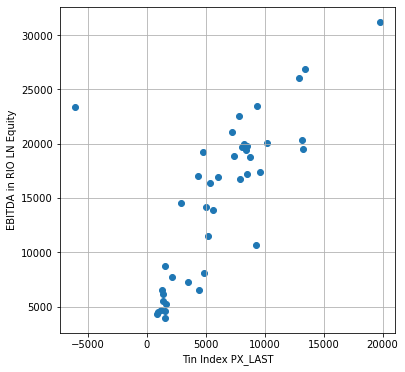


###################################################################

ANTO LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.793211 |
| Tin Index PX_LAST | 0.793211 |            1        |


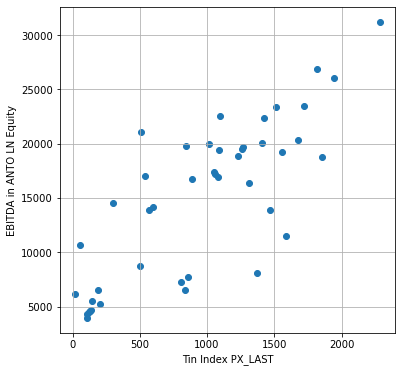


###################################################################

GLEN LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.308466 |
| Tin Index PX_LAST | 0.308466 |            1        |


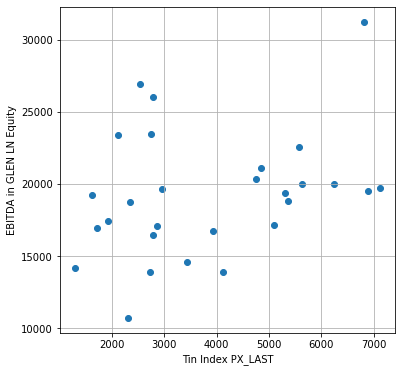


###################################################################

AAL LN Equity

|                   |   EBITDA |   Tin Index PX_LAST |
|:------------------|---------:|--------------------:|
| EBITDA            | 1        |            0.423159 |
| Tin Index PX_LAST | 0.423159 |            1        |


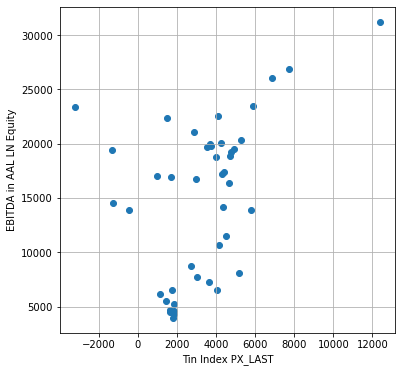


###################################################################



In [367]:
comodity_name = "Tin Index"
LMSNDS03_LME_Comdty   = pd.read_csv('LMSNDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Tin
LMSNDS03_LME_Comdty = format_commodity_data_of_form_DATES_AND_PX_LAST(LMSNDS03_LME_Comdty)
showCorrelationAndScatter(comodity_name, LMSNDS03_LME_Comdty, companies_financial_dataset, company_names)

## Lead
#### LMPBDS03 LME Comdty

          Dates  PX_LAST
0    04/04/2022   2413.0
1    03/31/2022   2416.0
2    02/28/2022   2387.0
3    01/31/2022   2244.5
4    12/31/2021   2304.0
..          ...      ...
296  08/29/1997    652.0
297  07/31/1997    632.0
298  06/30/1997    627.0
299  05/30/1997    633.0
300  04/30/1997    624.0

[301 rows x 2 columns]
EVR LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             | 1        |             0.410993 |
| Lead Index PX_LAST | 0.410993 |             1        |


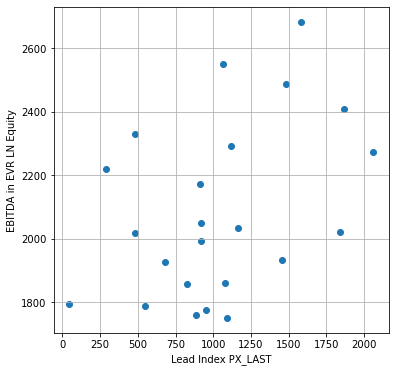


###################################################################

BHP LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             | 1        |             0.767729 |
| Lead Index PX_LAST | 0.767729 |             1        |


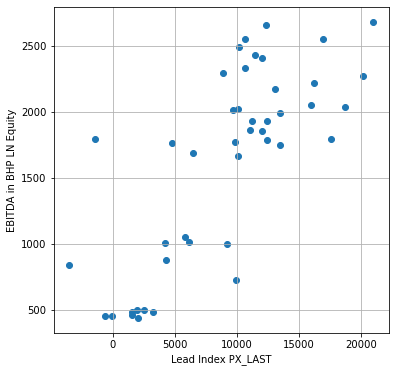


###################################################################

RIO LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             | 1        |             0.616128 |
| Lead Index PX_LAST | 0.616128 |             1        |


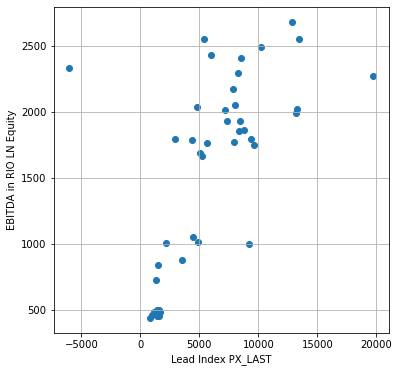


###################################################################

ANTO LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             | 1        |             0.769071 |
| Lead Index PX_LAST | 0.769071 |             1        |


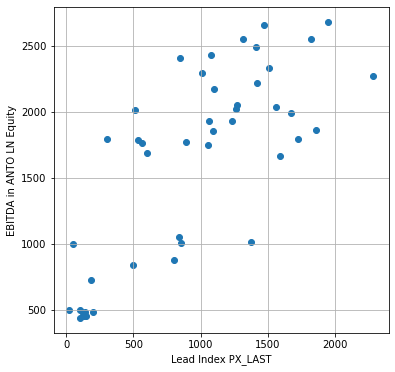


###################################################################

GLEN LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             | 1        |             0.162781 |
| Lead Index PX_LAST | 0.162781 |             1        |


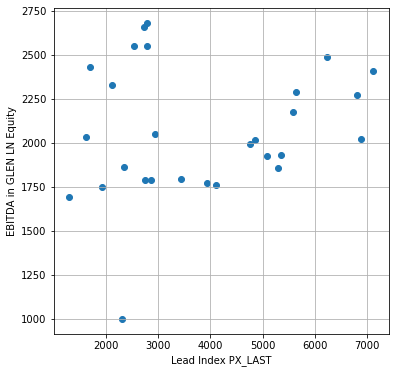


###################################################################

AAL LN Equity

|                    |   EBITDA |   Lead Index PX_LAST |
|:-------------------|---------:|---------------------:|
| EBITDA             |  1       |              0.34334 |
| Lead Index PX_LAST |  0.34334 |              1       |


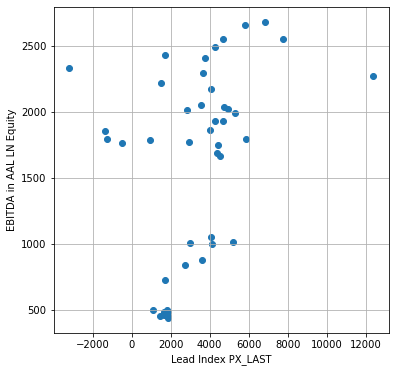


###################################################################



In [368]:
comodity_name = "Lead Index"
LMPBDS03_LME_Comdty   = pd.read_csv('LMPBDS03_LME_Comdty.csv'  , index_col=False, names=["Dates", "PX_LAST"])#Lead
LMPBDS03_LME_Comdty = format_commodity_data_of_form_DATES_AND_PX_LAST(LMPBDS03_LME_Comdty)
showCorrelationAndScatter(comodity_name, LMPBDS03_LME_Comdty, companies_financial_dataset, company_names)

## Lithium
#### LTBMPRIN Index (Only goes to 2009)

          Dates  PX_LAST
0    03/31/2022  1045.94
1    02/28/2022   869.18
2    01/31/2022   624.49
3    12/31/2021   461.73
4    11/30/2021   412.47
..          ...      ...
154  05/31/2009   101.24
155  04/30/2009   102.72
156  03/31/2009   101.28
157  02/28/2009   100.61
158  01/31/2009   100.00

[159 rows x 2 columns]
         Dates  PX_LAST
0   2009-01-31   100.00
1   2009-02-28   100.61
2   2009-03-31   101.28
3   2009-04-30   102.72
4   2009-05-31   101.24
..         ...      ...
154 2021-11-30   412.47
155 2021-12-31   461.73
156 2022-01-31   624.49
157 2022-02-28   869.18
158 2022-03-31  1045.94

[159 rows x 2 columns]
EVR LN Equity

|                       |   EBITDA |   Lithium Index PX_LAST |
|:----------------------|---------:|------------------------:|
| EBITDA                | 1        |                0.404972 |
| Lithium Index PX_LAST | 0.404972 |                1        |


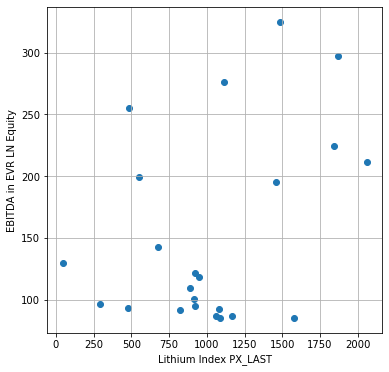


###################################################################

BHP LN Equity



KeyError: -1

In [350]:
comodity_name = "Lithium Index"

LTBMPRIN_Index = pd.read_csv('LTBMPRIN_Index.csv'       , index_col=False, names=["Dates", "PX_LAST"]) #Lithium
LTBMPRIN_Index = format_commodity_data_of_form_DATES_AND_PX_LAST(LTBMPRIN_Index)
print(LTBMPRIN_Index)
for company in company_names:
    print(company + "\n")
    companies_ebitda_vs_comodity = getEBITDAUnique(companies_financial_dataset,company)
    companies_ebitda_vs_comodity = add_closest_to_EBITDA_date_comodity(companies_ebitda_vs_comodity, LTBMPRIN_Index, comodity_name)
    print(companies_ebitda_vs_comodity.corr().to_markdown())
    scatterPlotCommodityLastPXVsEBITDA(companies_ebitda_vs_comodity, company, comodity_name)
    print("\n###################################################################\n")